In [5]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [6]:
def run(episodes, is_training=True, render=False):

    env = gym.make('MountainCar-v0', render_mode='human' if render else None)

    # Divide position and velocity into segments
    pos_space = np.linspace(env.observation_space.low[0], env.observation_space.high[0], 20)    # Between -1.2 and 0.6
    vel_space = np.linspace(env.observation_space.low[1], env.observation_space.high[1], 20)    # Between -0.07 and 0.07

    if(is_training):
        q = np.zeros((len(pos_space), len(vel_space), env.action_space.n)) # init a 20x20x3 array
    else:
        f = open('mountain_car.pkl', 'rb')
        q = pickle.load(f)
        f.close()

    learning_rate_a = 0.9 # alpha or learning rate
    discount_factor_g = 0.9 # gamma or discount factor.

    epsilon = 1         # 1 = 100% random actions
    epsilon_decay_rate = 2/episodes # epsilon decay rate
    rng = np.random.default_rng()   # random number generator

    rewards_per_episode = np.zeros(episodes)

    for i in range(episodes):
        state = env.reset()[0]      # Starting position, starting velocity always 0
        state_p = np.digitize(state[0], pos_space)
        state_v = np.digitize(state[1], vel_space)

        terminated = False          # True when reached goal

        rewards=0

        while(not terminated and rewards>-1000):

            if is_training and rng.random() < epsilon:
                # Choose random action (0=drive left, 1=stay neutral, 2=drive right)
                action = env.action_space.sample()
            else:
                action = np.argmax(q[state_p, state_v, :])

            new_state,reward,terminated,_,_ = env.step(action)
            new_state_p = np.digitize(new_state[0], pos_space)
            new_state_v = np.digitize(new_state[1], vel_space)

            if is_training:
                q[state_p, state_v, action] = q[state_p, state_v, action] + learning_rate_a * (
                    reward + discount_factor_g*np.max(q[new_state_p, new_state_v,:]) - q[state_p, state_v, action]
                )

            state = new_state
            state_p = new_state_p
            state_v = new_state_v

            rewards+=reward

        epsilon = max(epsilon - epsilon_decay_rate, 0)

        rewards_per_episode[i] = rewards

        print(f'Episode {i+1}/{episodes}, rewards: {rewards}')

    env.close()

    # Save Q table to file
    if is_training:
        f = open('mountain_car.pkl','wb')
        pickle.dump(q, f)
        f.close()

    mean_rewards = np.zeros(episodes)
    for t in range(episodes):
        mean_rewards[t] = np.mean(rewards_per_episode[max(0, t-100):(t+1)])
    plt.plot(mean_rewards)
    plt.savefig(f'mountain_car.png')

Episode 1/5000, rewards: -1000.0
Episode 2/5000, rewards: -1000.0
Episode 3/5000, rewards: -1000.0
Episode 4/5000, rewards: -1000.0
Episode 5/5000, rewards: -1000.0
Episode 6/5000, rewards: -1000.0
Episode 7/5000, rewards: -1000.0
Episode 8/5000, rewards: -1000.0
Episode 9/5000, rewards: -1000.0
Episode 10/5000, rewards: -1000.0
Episode 11/5000, rewards: -1000.0
Episode 12/5000, rewards: -1000.0
Episode 13/5000, rewards: -1000.0
Episode 14/5000, rewards: -1000.0
Episode 15/5000, rewards: -1000.0
Episode 16/5000, rewards: -1000.0
Episode 17/5000, rewards: -1000.0
Episode 18/5000, rewards: -1000.0
Episode 19/5000, rewards: -1000.0
Episode 20/5000, rewards: -1000.0
Episode 21/5000, rewards: -1000.0
Episode 22/5000, rewards: -1000.0
Episode 23/5000, rewards: -1000.0
Episode 24/5000, rewards: -1000.0
Episode 25/5000, rewards: -1000.0
Episode 26/5000, rewards: -1000.0
Episode 27/5000, rewards: -1000.0
Episode 28/5000, rewards: -1000.0
Episode 29/5000, rewards: -1000.0
Episode 30/5000, reward

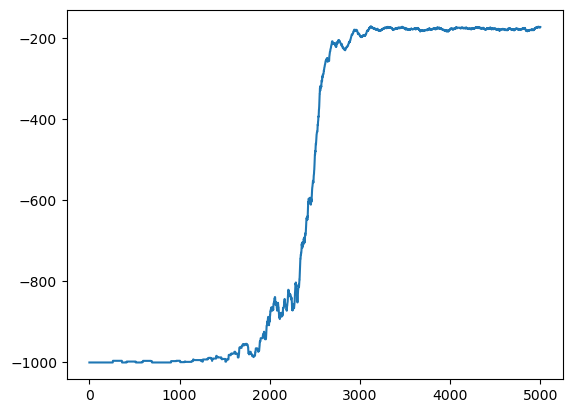

In [7]:
run(5000, True, False)

Episode 1/100, rewards: -161.0
Episode 2/100, rewards: -157.0
Episode 3/100, rewards: -163.0
Episode 4/100, rewards: -157.0
Episode 5/100, rewards: -159.0
Episode 6/100, rewards: -253.0
Episode 7/100, rewards: -156.0
Episode 8/100, rewards: -158.0
Episode 9/100, rewards: -161.0
Episode 10/100, rewards: -159.0
Episode 11/100, rewards: -159.0
Episode 12/100, rewards: -158.0
Episode 13/100, rewards: -159.0
Episode 14/100, rewards: -156.0
Episode 15/100, rewards: -244.0
Episode 16/100, rewards: -161.0
Episode 17/100, rewards: -160.0
Episode 18/100, rewards: -157.0
Episode 19/100, rewards: -155.0
Episode 20/100, rewards: -157.0
Episode 21/100, rewards: -157.0
Episode 22/100, rewards: -247.0
Episode 23/100, rewards: -246.0
Episode 24/100, rewards: -154.0
Episode 25/100, rewards: -157.0
Episode 26/100, rewards: -156.0
Episode 27/100, rewards: -162.0
Episode 28/100, rewards: -155.0
Episode 29/100, rewards: -155.0
Episode 30/100, rewards: -156.0
Episode 31/100, rewards: -159.0
Episode 32/100, r

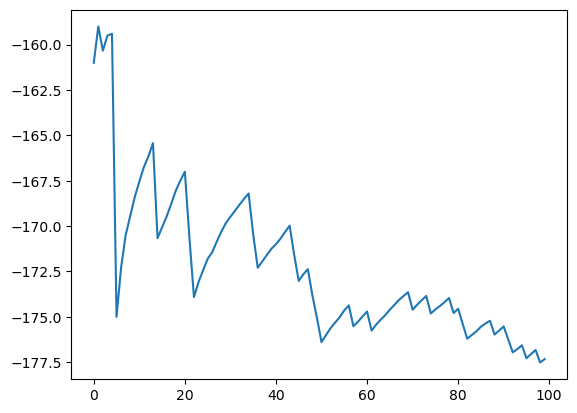

In [9]:
run(100, False, False)